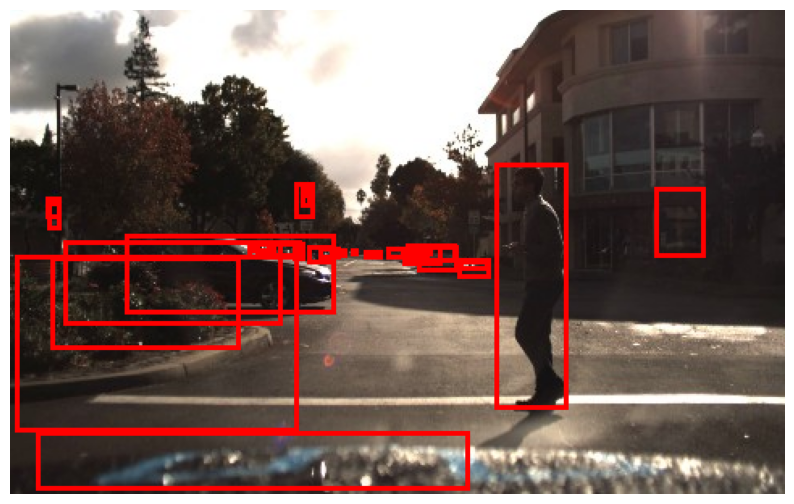

In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load your image
image_path = "/content/1478020284198449721.jpg"
image = Image.open(image_path)

# Transform the image
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for box in predictions[0]['boxes']:
    # Each box is (x1, y1, x2, y2)
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline="red", width=3)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()
